In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
SRBF_PATH = "/scratch/ceph/swei20/data/dnn/BHB/rbf_Blue_R2300_1k.h5"
BLUE_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_Blue_R2300.h5"
REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [6]:
with h5py.File(BLUE_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [7]:
flux0.shape, wave0.shape

((116614, 5368), (5368,))

In [8]:
from lv.base.dataloader_c import DataLoader

In [9]:
ds = DataLoader()

In [10]:
ds.prepare_data ("Blue", "B", flux0, wave0, para0, fix_CO=0)

flux: 3300, wave: 5368


# find mask

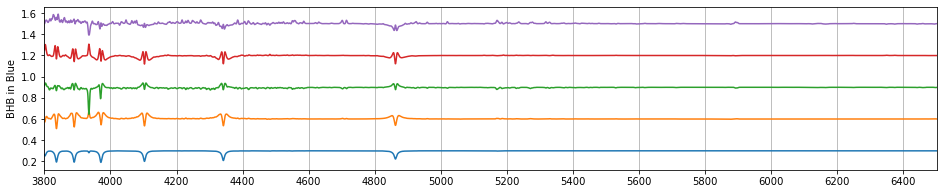

In [11]:
ds.init_pcp()

In [12]:
ds.flux.shape

(3300, 5368)

In [16]:
_,w,v =cp.linalg.svd(ds.flux, full_matrices=0)

(0.0, 25.0)

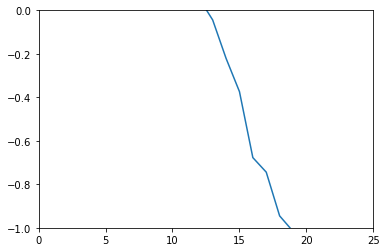

In [22]:
plt.plot(np.log(cp.asnumpy(w)))
plt.ylim(-1,0)
plt.xlim(0,25)

In [33]:
# k,q,prom = 10, 0.75, 0.1
k,q,prom = 5, 0.8, 0.01
peaks, prop, nvv= ds.get_peaks(k=k,q=q,prom=prom)

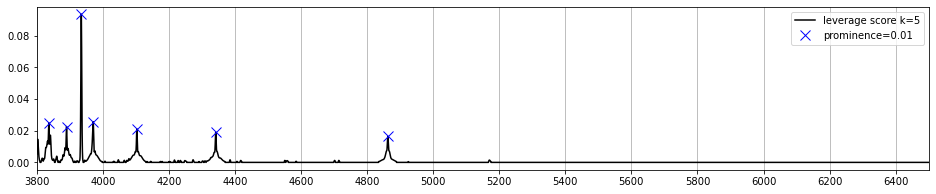

In [34]:
ds.plot_peaks(nvv, peaks, k, prom)

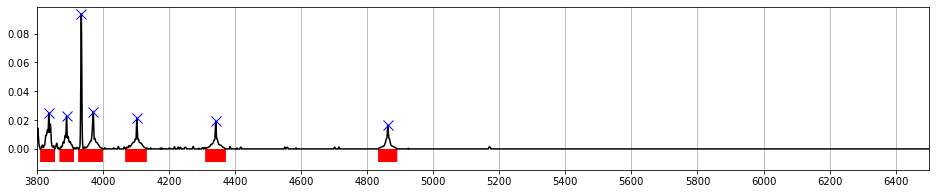

In [35]:
ds.plot_mask_from_peaks(peaks, prop, nvv)

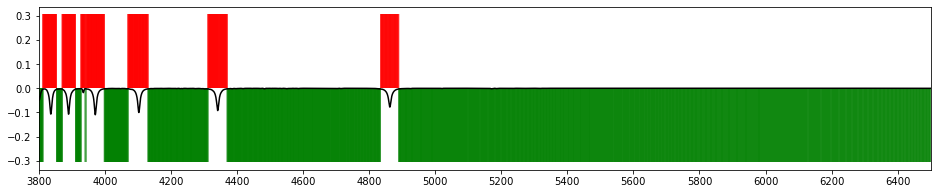

In [36]:
ds.plot_MN_mask(0)

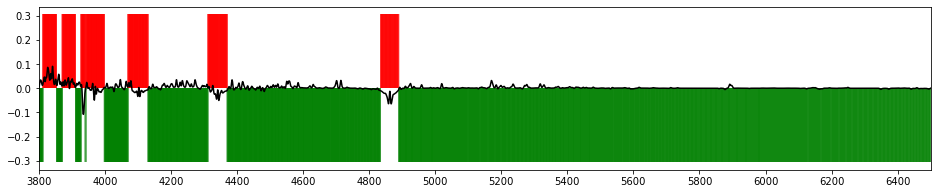

In [37]:
ds.plot_MN_mask(4)

In [39]:
# ds.plot_lick()

In [40]:
ds.get_MN(ds.nmask, top=5)

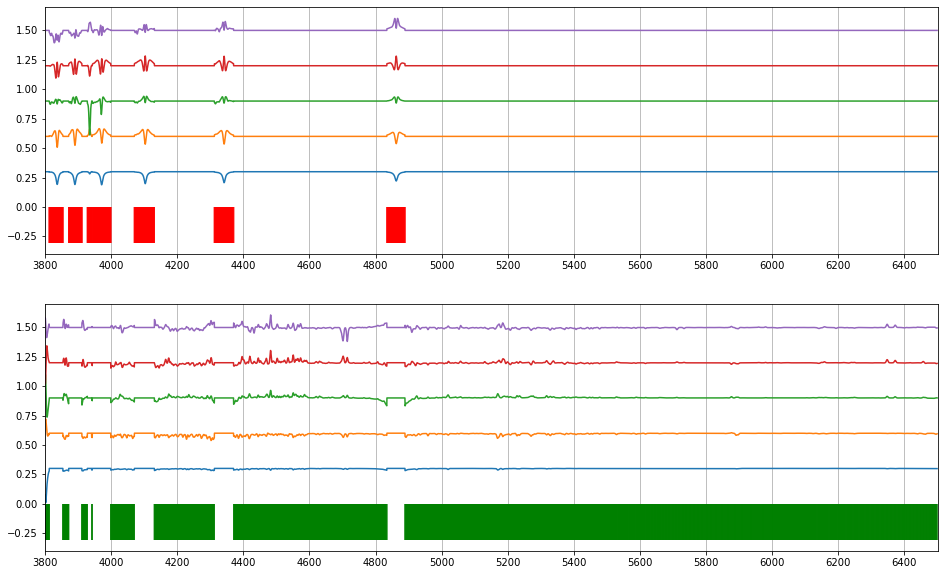

In [41]:
ds.plot_MN(step=0.3)

In [46]:
mu = 1.0 / ds.Mw[2]
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-5, mu=mu, lam=None, norm=None, maxiter=1000)

mu 0.03, lambda 0.0174, norm 465616.8


L(31, 780), S(30, 780)


(31, 5368)


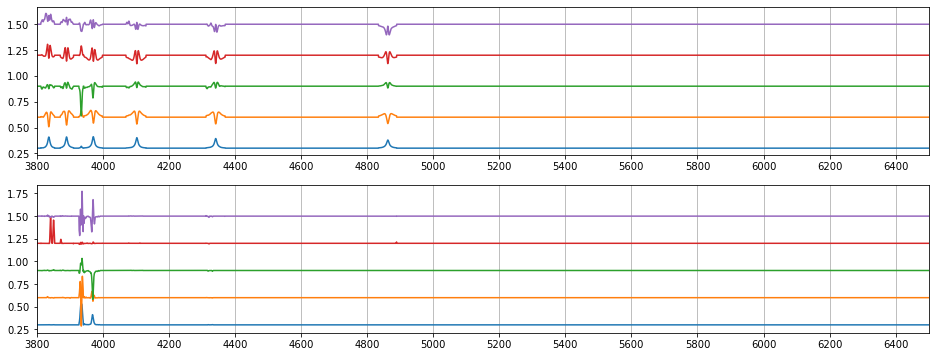

In [48]:
nMLv, nMSv =ds.eval_pcp(MLv, MSv)

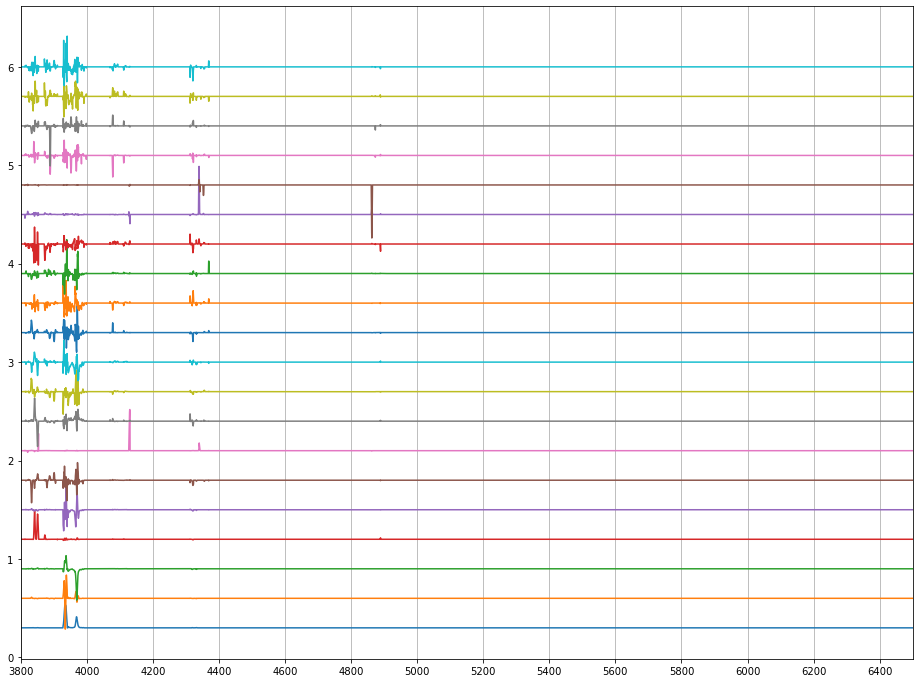

In [49]:
ds.plot_V(nMSv, top=20)

In [52]:
mu = 1.0 / ds.Nw[2]
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=mu, lam=None, norm=None, maxiter=1000)

mu 0.12, lambda 0.0174, norm 13353.8


L(61, 4588), S(30, 4588)


(61, 5368)


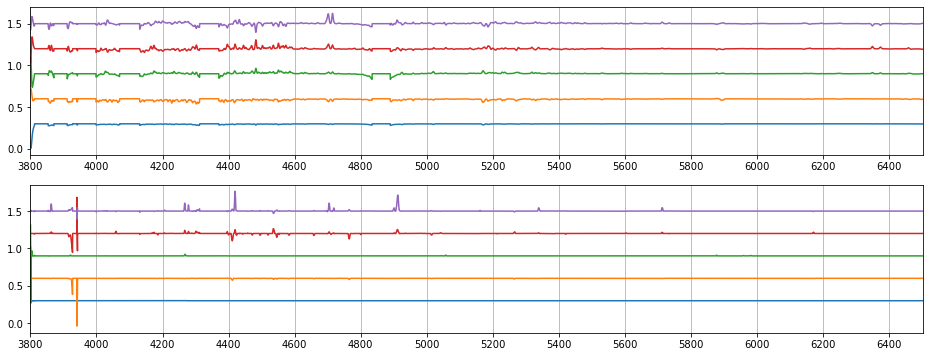

In [53]:
nNLv, nNSv = ds.eval_pcp(NLv, NSv, isM=0)

In [54]:
ds.pcp_transform(MLv, MSv, NLv, NSv, top=20)

In [55]:
ds.pcp_np(save=1)

In [523]:
ds.npcpFlux.shape

(3300, 60)